# **QUANTIUM - CHAINS RETAILS SALES ANALYSIS - DEEPDIVE**

## **1. Import the dataset**

### **1.1. Import and Examine the data**

In [13]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings 
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import t


In [ ]:
# Import the assgiment data
df = pd.read_csv("Dataset/QVI_data.csv")
display(df.head())

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [15]:
# Create a function to exmine the data
def examine_data(df):
    """ Function to examine the data and summarize the results in a table format."""
    total_rows = len(df)

    result = pd.DataFrame({
        'rows_count': [total_rows] * df.shape[1],
        'rows_with_nulls': df.isnull().sum(),
        'unique' : df.nunique() == total_rows,
        'cardinality': df.nunique(),
        'with_nulls': df.isnull().any(),
        'null_%': round((df.isnull().sum()/total_rows * 100),1),
        '1st_row': df.iloc[0],
        'last_row': df.iloc[-1],
        'random_row': df.sample(1).iloc[0],
        'data_type': df.dtypes
    })

    return result

In [16]:
examine_data(df)

,rows_count,rows_with_nulls,unique,cardinality,with_nulls,null_%,1st_row,last_row,random_row,data_type
LYLTY_CARD_NBR,264834,0,False,72636,False,0.0,1000,2373711,150368,int64
DATE,264834,0,False,364,False,0.0,2018-10-17,2018-12-14,2019-03-21,object
STORE_NBR,264834,0,False,272,False,0.0,1,88,150,int64
TXN_ID,264834,0,False,263125,False,0.0,1,241815,149719,int64
PROD_NBR,264834,0,False,114,False,0.0,5,16,51,int64
PROD_NAME,264834,0,False,114,False,0.0,Natural Chip Compny SeaSalt175g,Smiths Crinkle Chips Salt & Vinegar 330g,Doritos Mexicana 170g,object
PROD_QTY,264834,0,False,5,False,0.0,2,2,2,int64
TOT_SALES,264834,0,False,111,False,0.0,6.0,11.4,8.8,float64
PACK_SIZE,264834,0,False,21,False,0.0,175,330,170,int64
BRAND,264834,0,False,21,False,0.0,NATURAL,SMITHS,DORITOS,object


### **1.2. Clean and prepare the data**

### **1.2.1. Adjust the data type**

In [17]:
# Convert date columns to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

examine_data(df)

,rows_count,rows_with_nulls,unique,cardinality,with_nulls,null_%,1st_row,last_row,random_row,data_type
LYLTY_CARD_NBR,264834,0,False,72636,False,0.0,1000,2373711,13049,int64
DATE,264834,0,False,364,False,0.0,2018-10-17 00:00:00,2018-12-14 00:00:00,2018-12-13 00:00:00,datetime64[ns]
STORE_NBR,264834,0,False,272,False,0.0,1,88,13,int64
TXN_ID,264834,0,False,263125,False,0.0,1,241815,11403,int64
PROD_NBR,264834,0,False,114,False,0.0,5,16,12,int64
PROD_NAME,264834,0,False,114,False,0.0,Natural Chip Compny SeaSalt175g,Smiths Crinkle Chips Salt & Vinegar 330g,Natural Chip Co Tmato Hrb&Spce 175g,object
PROD_QTY,264834,0,False,5,False,0.0,2,2,2,int64
TOT_SALES,264834,0,False,111,False,0.0,6.0,11.4,6.0,float64
PACK_SIZE,264834,0,False,21,False,0.0,175,330,175,int64
BRAND,264834,0,False,21,False,0.0,NATURAL,SMITHS,NATURAL,object


### **1.2.1. Remove duplicates if any**

In [18]:
# Create a function to check for duplicates
def check_duplicate(df):
    duplicates = df.duplicated().sum()
    check_dup = duplicates > 0 
    duplicates_percent = 0
    # Add a column to mark duplicates
    df['is_duplicate'] = df.duplicated(keep=False)
    duplicates_df = pd.DataFrame()
    if check_dup:
        duplicates_percent = round((duplicates/len(df)*100),2)
        print(f'There are {duplicates} ({duplicates_percent :.2f}%) duplicate rows in the dataset.')
        duplicates_df = df[df['is_duplicate']].copy()
        duplicates_df.drop(columns=['is_duplicate'], inplace=True)
        print('Here are the duplicate rows:')
        display(duplicates_df)
    else:
        print('There are no duplicate rows in the dataset.')
    df.drop(columns = ['is_duplicate'], inplace=True)

In [19]:
# Check for duplicate
check_duplicate(df)

There are 1 (0.00%) duplicate rows in the dataset.
Here are the duplicate rows:


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
106247,107024,2018-10-01,107,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,SMITHS,OLDER SINGLES/COUPLES,Premium
106249,107024,2018-10-01,107,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,SMITHS,OLDER SINGLES/COUPLES,Premium


#### **1.3. Exmamine the data**

In [20]:
# Examine the time period in the data 
last_date = df['DATE'].max()
first_date = df['DATE'].min()

# Print out the time period
print(f"The data begin from {first_date} to {last_date}")

The data begin from 2018-07-01 00:00:00 to 2019-06-30 00:00:00


## **2. Store performance experiments**

The chain decide to conduct a trials on some trial store (77, 86 and 88) to be established stores that are operational for the entire 
observation period to access if the improvements which was identified in a plan succeed in improving the store performance. The data was collected and now analyzed. 
The trial period: From February to June 2019

### **2.1. Control Stores selection**

 We would want to match trial stores to control stores that are similar to the trial
 store prior to the trial period of Feb 2019 in terms of :
 - Monthly overall sales revenue
 - Monthly number of customers
 - Monthly number of transactions per custome

Create the metrics of interest and filter to stores that are present throughout the pre-trial period (before February 2019)

In [21]:
# Add a new month ID column in the data with the format yyyymm
df['MONTH_YEAR'] = df['DATE'].dt.strftime('%Y%m')

# Calculate total sales per store per month
store_sales_monthly = df.groupby(['STORE_NBR','MONTH_YEAR'])['TOT_SALES'].sum().reset_index() 

# Calculate number of customers per store per month 
store_customer_monthly = df.groupby(['STORE_NBR','MONTH_YEAR'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Calculate number of transaction per store per month 
store_trans_monthly = df.groupby(['STORE_NBR','MONTH_YEAR'])['TXN_ID'].nunique().reset_index() 

# Calculate quantity of chip sold per store per month 
store_qty_monthly = df.groupby(['STORE_NBR','MONTH_YEAR'])['PROD_QTY'].sum().reset_index() 

# Create a complete df of monthly metrics by store
monthly_store = store_sales_monthly.merge(
    store_customer_monthly, on=['STORE_NBR', 'MONTH_YEAR'], how='left', suffixes=('_SALES', '_CUSTOMERS')
).merge(
    store_qty_monthly, on=['STORE_NBR', 'MONTH_YEAR'], how='left'
).merge(
    store_trans_monthly, on=['STORE_NBR', 'MONTH_YEAR'], how='left'
)

monthly_store.columns = ['STORE_NBR', 'MONTH_YEAR', 'TOT_SALES', 'CUS_QTY', 'PROD_QTY', 'TRANS_QTY']

# Create transactions made per customers column
monthly_store['TRANS_PER_CUS'] =( monthly_store['TRANS_QTY'] / monthly_store['CUS_QTY'] ).round(2)
# Create average transactions value column
monthly_store['AVG_VALUE_PER_TXN'] = (monthly_store['TOT_SALES'] / monthly_store['TRANS_QTY']).round(2)
# Ceate average amount of chips each customer by per transactions 
monthly_store['AVG_QTY_PER_TXN'] = (monthly_store['PROD_QTY'] / monthly_store['TRANS_QTY']).round(2)

monthly_store


,STORE_NBR,MONTH_YEAR,TOT_SALES,CUS_QTY,PROD_QTY,TRANS_QTY,TRANS_PER_CUS,AVG_VALUE_PER_TXN,AVG_QTY_PER_TXN
0,1,201807,206.9,49,62,52,1.06,3.98,1.19
1,1,201808,176.1,42,54,43,1.02,4.10,1.26
2,1,201809,278.8,59,75,62,1.05,4.50,1.21
3,1,201810,188.1,44,58,45,1.02,4.18,1.29
4,1,201811,192.6,46,57,47,1.02,4.10,1.21
...,...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,91,48,1.07,8.24,1.90
3165,272,201903,442.3,50,101,53,1.06,8.35,1.91
3166,272,201904,445.1,54,105,55,1.02,8.09,1.91
3167,272,201905,314.6,34,71,40,1.18,7.86,1.78


In [22]:
# Find store with full observatioon (12 months of data)
months_per_store = store_sales_monthly.groupby('STORE_NBR')['MONTH_YEAR'].nunique()
full_data_stores = months_per_store[months_per_store == 12].index

# Filter full observations stores only 
monthly_store = monthly_store[monthly_store['STORE_NBR'].isin(full_data_stores)]

# Filter pre- trial period 
monthly_store_pretrial = monthly_store[monthly_store['MONTH_YEAR'] < '201902']

In [23]:
# ---Function to calculate correaltion ---
def calculate_correlation(df,metric,store_nbr):
    """
    Calculates the correlation of a metric between a trial store and all other stores.
    To use inside the loop. 

    """
    # Pivot the df to have stores as columns and months as rows
    pivot_df = df.pivot(index='MONTH_YEAR', columns = 'STORE_NBR',values=metric)
    # Calculate correalation b
    correlation = pivot_df.corrwith(pivot_df[store_nbr])
    # Format the result into a Df 
    corr_df = pd.DataFrame({
        'Store1' : store_nbr,
        'Store2' : correlation.index,
        'corr_measure' : correlation.values
    }).reset_index(drop=True)

    return corr_df

# --- Function to calculate magnitude distance --- 
def calculate_difference(df,metric,store_nbr):
    """
    Calculates the standardized magnitude distance of a metric between a trial store and all other stores.
    Agg: 
        - df: dataframe contains metrics by month and store 
        - metric: a string identify metric column in the df 
        - store_nbr: a integer identify trial a store number
    """
    # Extract df for the metric 
    trial_stores_df = df[df['STORE_NBR'] == store_nbr]

    # Check if the trial_stores_df has data:
    if trial_stores_df.empty:
        print(f"Warning: Trial store {store_nbr} not found in pre-trial data.")
        # Return an empty DF wthi the correct columns  
        return pd.DataFrame(columns=['Store1','Store2','magnitude'])
    # Extract only MONTH_YEAR and the metric for trial store 
    trial_metric = trial_stores_df[['MONTH_YEAR',metric]].rename(columns={metric : 'trial_metric'})
    # Merge trial store data to the orginal data to compare 
    comparison_df = pd.merge(df,trial_metric, on = 'MONTH_YEAR', how = 'left')
    # Calculate the absolute difference in the metric 
    comparison_df['measure_diff'] = abs(comparison_df[metric] - comparison_df['trial_metric'])
    # Standadize the difference 
    min_max_diffs = comparison_df.groupby('MONTH_YEAR')['measure_diff'].agg(['min','max']).reset_index()
    dist_df = pd.merge(comparison_df,min_max_diffs, on = 'MONTH_YEAR')
    denominator = dist_df['max'] - dist_df['min']
    dist_df['magnitude_std'] = 1- (dist_df['measure_diff'] - dist_df['min']) / np.where(denominator == 0, 1, denominator)

    # Calculate the average magnitude score for each store
    final_dist = dist_df.groupby('STORE_NBR')['magnitude_std'].mean().reset_index()
    final_dist = final_dist.rename(columns={'STORE_NBR':'Store2'})
    final_dist['Store1'] = store_nbr

    return final_dist

# --- Main function to Find the Best Control Store ---
def find_control(df,trial_store,metric_to_use = ['TOT_SALES','CUS_QTY']):
    """
    Finds the best control store for a given trial store based on correlation and magnitude distance.
    """

    all_scores = []
    # Calculate all scores for the given trial store, this loop create a list of dataframe of the score of the testing stores vs trial store
    for col in metric_to_use:
        # Calculate correlation and magnitude for the current metric
        corr = calculate_correlation(df,col,trial_store)
        diff = calculate_difference(df,col,trial_store)
        # ComputeSS the scores for the current metric 
        corr_weight = 0.5
        score_df = pd.merge(corr,diff,on=['Store1','Store2'])

        # Rename repeated columns 
        score_col_name = f'score_{col}'
        score_df[score_col_name] = (corr_weight * score_df['corr_measure']) + ((1 - corr_weight) * score_df['magnitude_std'] ) 
        all_scores.append(score_df[['Store2', score_col_name]])
    # Merge all the individual metric scores
    final_scores = pd.DataFrame({'Store2' : df['STORE_NBR'].unique()})
    for score_df in all_scores:
        final_scores = pd.merge(final_scores, score_df, on = 'Store2', how='left')

    # Calculate the final control store by averaging the scores for each metric 
    score_cols = [f'score_{metric}' for metric in metric_to_use]
    final_scores['finalScore'] = final_scores[score_cols].mean(axis=1)
    
    best_control_store = final_scores[final_scores['Store2'] != trial_store].sort_values(by='finalScore', ascending = False).iloc[0]
    return int(best_control_store['Store2'])


In [24]:
# Find the control stores for trial stores 
trial_stores_list = [77,86,88]
metric_to_use = ['TOT_SALES','CUS_QTY']

# Run the function to find best control store for each trial store 
control_store_map = {}
for i in trial_stores_list:
    control_store = find_control(monthly_store_pretrial,i,metric_to_use)
    control_store_map[i] = control_store

print("Control store find results:")
print("------------------------------------")
for i,control in control_store_map.items():
    print(f" - The best control store for Trial store {i} is: Store {control}.")    

Control store find results:
------------------------------------
 - The best control store for Trial store 77 is: Store 233.
 - The best control store for Trial store 86 is: Store 155.
 - The best control store for Trial store 88 is: Store 237.


In [13]:
control_store_map

{77: 233, 86: 155, 88: 237}

In [14]:
monthly_store_pretrial

,STORE_NBR,MONTH_YEAR,TOT_SALES,CUS_QTY,PROD_QTY,TRANS_QTY,TRANS_PER_CUS,AVG_VALUE_PER_TXN,AVG_QTY_PER_TXN
0,1,201807,206.9,49,62,52,1.06,3.98,1.19
1,1,201808,176.1,42,54,43,1.02,4.10,1.26
2,1,201809,278.8,59,75,62,1.05,4.50,1.21
3,1,201810,188.1,44,58,45,1.02,4.18,1.29
4,1,201811,192.6,46,57,47,1.02,4.10,1.21
...,...,...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,71,36,1.12,8.46,1.97
3160,272,201810,430.6,44,99,50,1.14,8.61,1.98
3161,272,201811,376.2,41,87,45,1.10,8.36,1.93
3162,272,201812,403.9,47,89,47,1.00,8.59,1.89


##### **2.1.1. Visual Trend comparison for Selected Store**

In [15]:
# --- Create a function to plot line plot for each metric for a pair of control-trial store
def visual_check(df,trial_store,control_store_map = control_store_map,metric_to_use = ['TOT_SALES','CUS_QTY']):
    """ 
    Creates a 2x1 plot to visually compare metrics between a trial store and its control store.
    This version uses a robust method to handle the plotting axes.

    Args: 
        - df: DataFrame containing both trial and control store data for the pre-trial period.
        - trial_store: The trial store number.
        - control_store_map: The dictionary mapping trial stores to control stores.
        - metric_to_use: A list of metrics to compare.
    """
    
    # Retreive the control store number 
    control_store = control_store_map[trial_store]
    # Prepare the df for plotting 
    col_to_plot = ['MONTH_YEAR'] + metric_to_use
    control_monthly = df[df['STORE_NBR'] == control_store][col_to_plot]
    trial_monthly = df[df['STORE_NBR'] == trial_store][col_to_plot]

    # Initialize the plot
    fig,ax = plt.subplots(len(metric_to_use),1, figsize = (10,8)) 
    fig.suptitle(f'Visual Check: Trial Store {trial_store} vs Control Store {control_store}', fontsize=14)
    
    # Loop through list of metric to plot the 2 charts of trial vs control 
    for i, (metric, subplot_ax) in enumerate(zip(metric_to_use, ax.flat)):
        # Plot each subplot
        subplot_ax.plot(trial_monthly['MONTH_YEAR'],trial_monthly[metric],marker = 'o', linestyle = "-", label = "Trial")
        subplot_ax.plot(control_monthly['MONTH_YEAR'],control_monthly[metric],marker = 'o', linestyle = "-", label= "Control")
        
        # Customize
        subplot_ax.set_title(f'{metric} Over Time')
        subplot_ax.set_ylabel(metric)
        subplot_ax.legend()
    
    # Customize the plot 
    plt.xlabel('Month - year')
    plt.tight_layout(rect=[0, 0, 0.95, 0.96])
    plt.show()


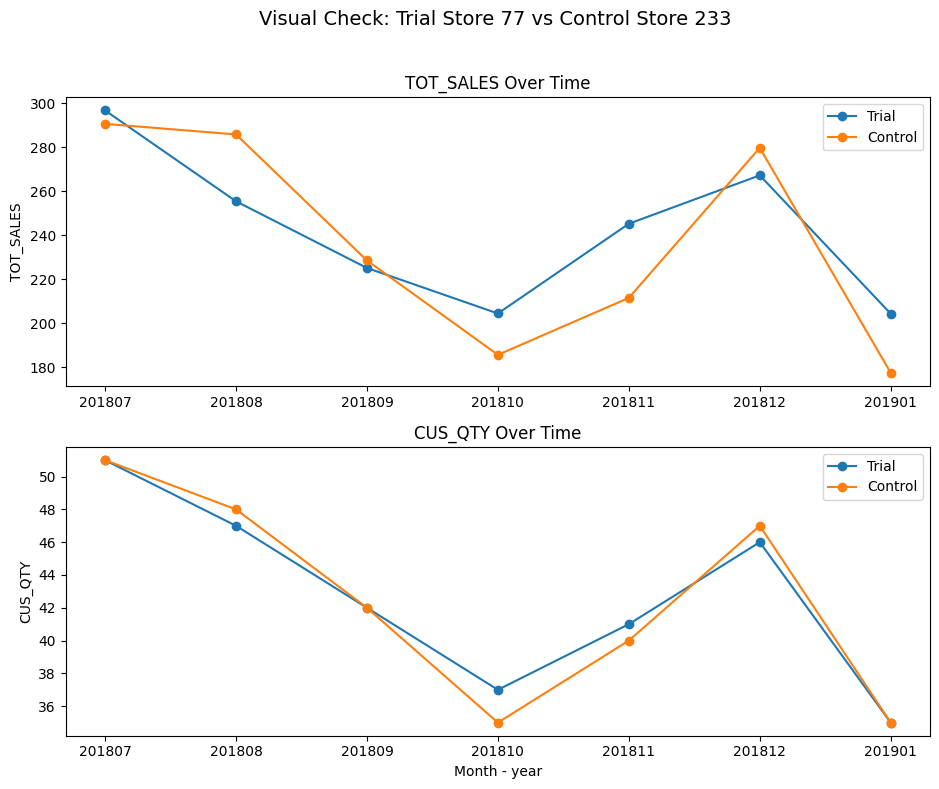

In [16]:
# Visual check store 77 and its selection
visual_check(monthly_store_pretrial,77,control_store_map)

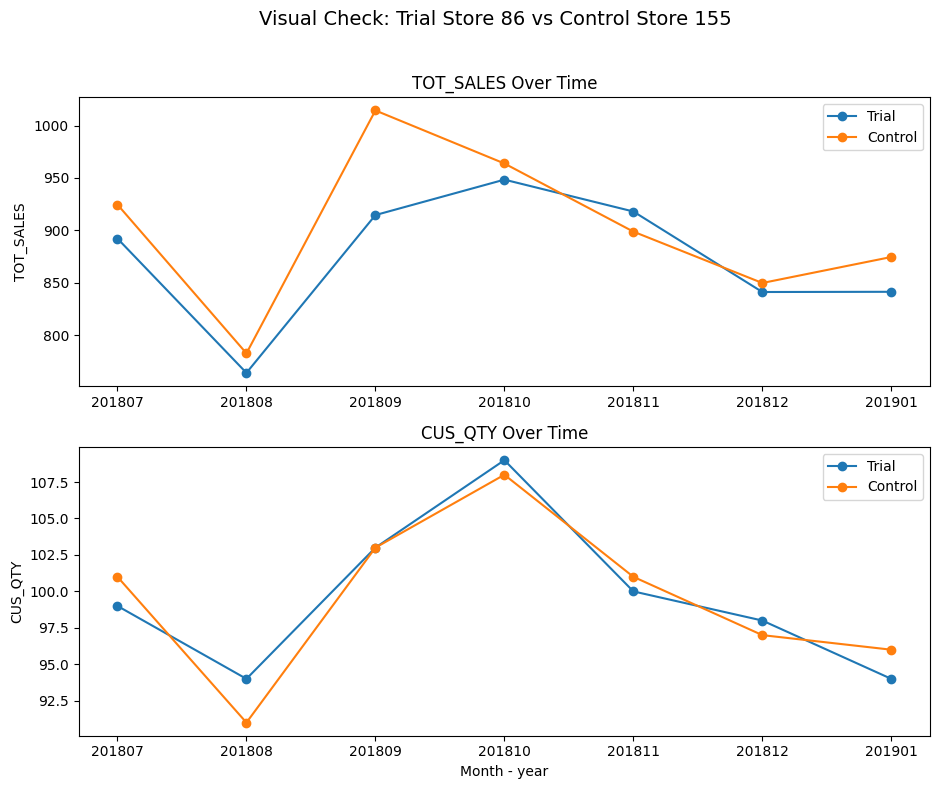

In [17]:
# Visual Check for Trial store 86 and its control store
visual_check(monthly_store_pretrial,86)

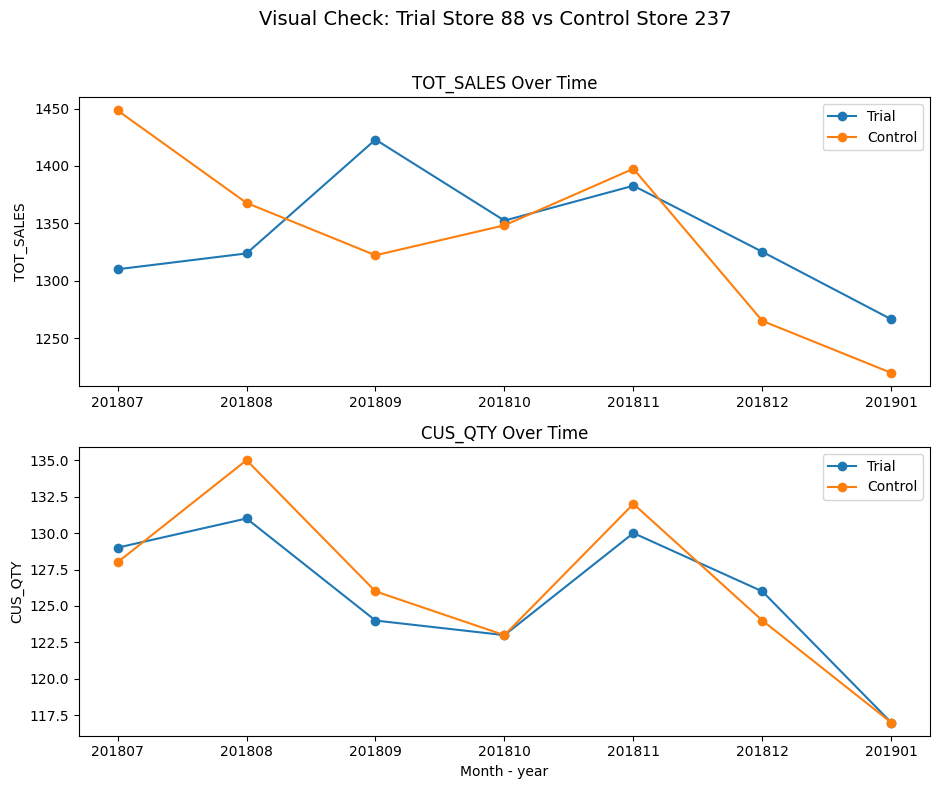

In [18]:
# Visual Check for Trial store 88 and its control store
visual_check(monthly_store_pretrial,88)

### **2.2. Trial Assesement**
With control stores selected, we now assess the trial's impact on sales from *February to April 2019*. To isolate the effect of the trial, we first adjust the control store's sales to create a comparable baseline, controlling for any pre-existing differences in store performance."

The null hypothesis is that the trial period is the same as the pre-trial period.


In [39]:
# Create a function to calculate scaling factor for TOT_SALES
def trial_assessment(df,df_trial,trial_store,control_store_map, metric_to_use):
    """
    A function to calculate scaling factor of Total sales to scale the control store to 
    Args:
        - df: the dataframe of monthly metrics by stores in the pre-trial period 
        - df_trial: the dataframe of monthly metrics by stores full period
        - control_store_map: dictionary of trial and control store 
        - metric_to_use: a metric 'TOT_SALES' or 'CUS_QTY'
    """
    # Identify control store number
    control_store = control_store_map[trial_store]
    # Step 1: Calculate the scaling factor
    tot_sales_trial = df[df['STORE_NBR'] == trial_store][metric_to_use].sum()
    tot_sales_control = df[df['STORE_NBR'] == control_store][metric_to_use].sum()
    scalingFactor = tot_sales_trial / tot_sales_control
    
    # Step 2: Create a combined scaling sales (for control store)
    cols_need = ['STORE_NBR','MONTH_YEAR'] + [metric_to_use]
    monthly_stores_metric = df_trial[df_trial['STORE_NBR'].isin([trial_store,control_store])][cols_need]
    monthly_stores_metric[f'scaled_{metric_to_use}'] = (monthly_stores_metric[metric_to_use] * np.where(monthly_stores_metric['STORE_NBR'] == control_store,scalingFactor,1)).round(1)

    # Step 3: Calculate the percentage Difference between metric of control and trial store 
    # Create a pivot df of month-year as index, metric column and values as scaled_metric
    trial_pivot = monthly_stores_metric.pivot(index = 'MONTH_YEAR', columns='STORE_NBR',values=f'scaled_{metric_to_use}')
    trial_pivot['percentage_diff'] = (trial_pivot[trial_store] - trial_pivot[control_store] )/ trial_pivot[control_store]

    # Step 4: Calculate Pre-trial Standard Deviation 
    # Calculate the std_dev before the trial period Feb 2019
    pretrial_pivot = trial_pivot[trial_pivot.index < '201902']
    std_dev = pretrial_pivot['percentage_diff'].std()
    # Calculate the degree of freedom n - 1 and the critical value 
    degrees_of_freedom = len(pretrial_pivot.index) - 1 
    critical_value = stats.t.ppf(0.95,df = degrees_of_freedom)

    # Step 5: Calculate the T-Statistic for the Trial Months 
    trial_month = ['201902','201903','201904']
    results = []

    # Loop through each trial month to assess:
    for month in trial_month:
        # Get the percentage difference for the month 
        percent_diff = trial_pivot.loc[month,'percentage_diff']
        # Calculate the t-statistic for the month 
        t_stat = (percent_diff - 0) / std_dev 
        # Compare to the critical value 
        is_significant = t_stat > critical_value

        results.append({'MONTH_YEAR' : month,
                        'Trial': trial_pivot.loc[month,trial_store],
                        'Control':trial_pivot.loc[month,control_store],
                        'percentage_diff' : f"{percent_diff:.2%}",
                        't_stat' : t_stat,
                        'is_significant' : is_significant,
                       })
    results_df = pd.DataFrame(results)

    # Step 6: Plot the assessment line plot 
    # Create Upper and Lower Bound column for plotting 
    trial_pivot['Upper_Bound_95'] = trial_pivot[control_store] * (1 + 2*std_dev)
    trial_pivot['Lower_Bound_95'] = trial_pivot[control_store] * (1 - 2*std_dev)
    # Create the plot 
    plt.figure(figsize = (12,6))

    # Plot the trial and scaled control metrics
    plt.plot(trial_pivot.index.astype(str), trial_pivot[trial_store], label = f"Trial Store {metric_to_use}", marker ='o')
    plt.plot(trial_pivot.index.astype(str), trial_pivot[control_store], label = f"Scaled Control Store {metric_to_use}", marker ='o', linestyle = '--', color = 'lightblue')

    # Shade the confidence interval 
    plt.fill_between(trial_pivot.index.astype(str),trial_pivot['Lower_Bound_95'], trial_pivot['Upper_Bound_95'], color='grey', alpha = 0.15, label = '95% Confidence interval')
    # Highlight the trial period 
    start_index = trial_pivot.index.get_loc('201902')
    end_index = trial_pivot.index.get_loc('201904')
    plt.axvspan(start_index - 0.5,end_index + 0.5 ,color = 'yellow', alpha = 0.3, label = 'Trial period')
    # Customize the chart 
    plt.title(f'Trial {metric_to_use} Assessment : Trial Store {trial_store} vs Control Store {control_store}')
    plt.xlabel('Month-year')
    plt.ylabel(f'{metric_to_use}')
    plt.legend()
    plt.grid(True,which = 'both', linestyle = '--')
    plt.show
    # Annotate the chart 
    for month in ['201902','201903','201904']:
        if results_df.loc[month,'is_significant']  == True:
            pct = results_df.loc[month,'percentage_diff']
            x = month
            y = results_df.loc[month,'Trial']
            plt.annotate(f"{float(pct.strip('%')):.2f}%", 
                         xy=(x, y), 
                         xytext=(0, 10), 
                         textcoords='offset points', 
                         ha='center', 
                         fontsize=6, 
                         color='red', 
                         arrowprops=dict(arrowstyle='->', color='red'))
    
    return results_df


,MONTH_YEAR,Trial,Control,percentage_diff,t_stat,is_significant
0,201902,235.0,249.8,-5.92%,-0.594853,False
1,201903,278.5,203.8,36.65%,3.680074,True
2,201904,263.5,162.3,62.35%,6.260400,True


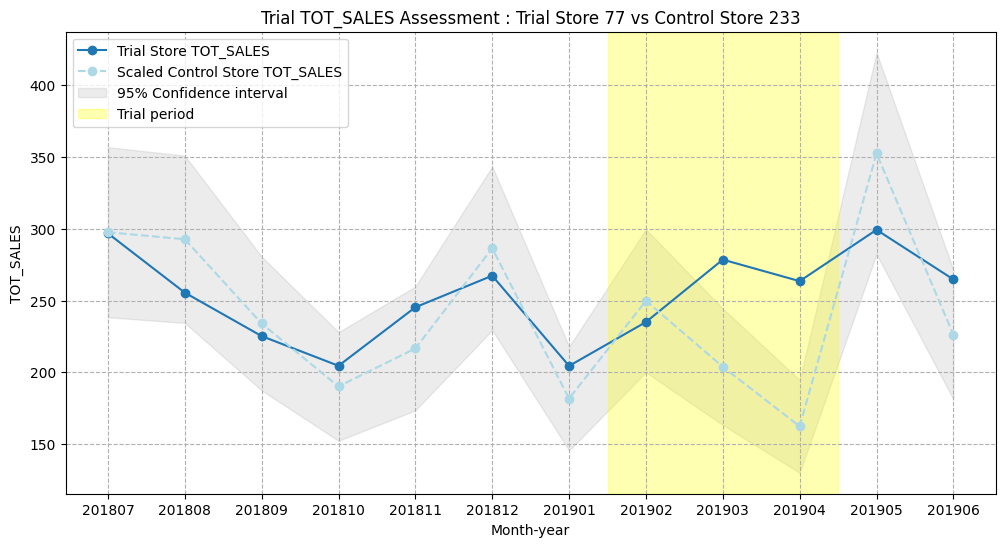

In [35]:
# Apply the function for store 77 on metric total sales 
results_store_77 = trial_assessment(monthly_store_pretrial,monthly_store,77,control_store_map,'TOT_SALES')
display(results_store_77)

,MONTH_YEAR,Trial,Control,percentage_diff,t_stat,is_significant
0,201902,45.0,45.2,-0.44%,-0.158311,False
1,201903,50.0,40.1,24.69%,8.833016,True
2,201904,47.0,30.1,56.15%,20.088079,True


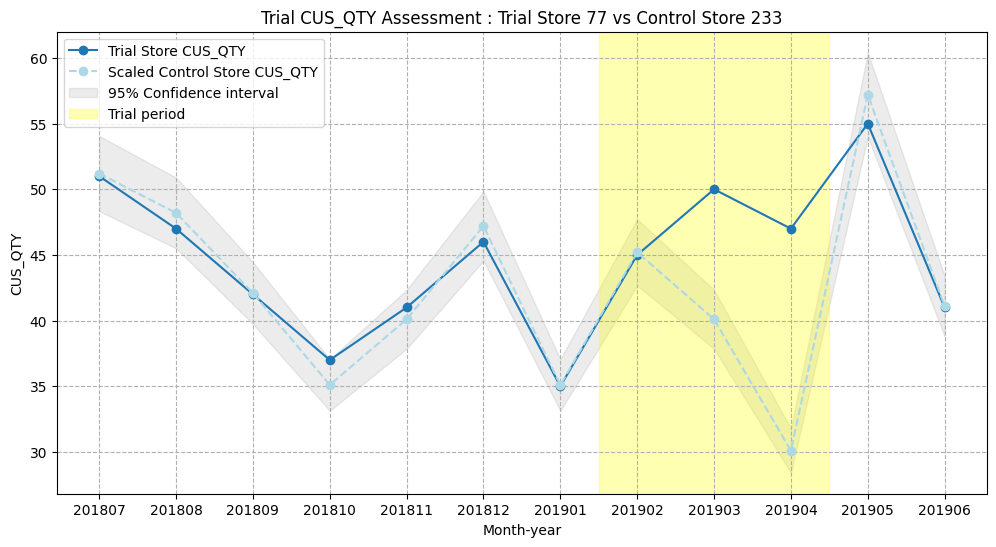

In [36]:
# Apply the function for store 77 on metric 'CUS_QTY'
results_store_77_CUS = trial_assessment(monthly_store_pretrial,monthly_store,77,control_store_map,'CUS_QTY')
display(results_store_77_CUS)

##### **Assessment of Trial Store 77 (vs. Control Store 233)**
Significant Sales and customer amount Uplift During Trial: During the trial period (highlighted in yellow), there is a clear outperformance by the trial store.
- For the months of March and April 2019, the trial store's sales (blue line) are visibly above the sales of the scaled control store.
- Post-Trial Observation: It's also interesting to note that in May 2019, after the trial concluded, the control store experienced a significant sales spike while the trial store did not. 

**Overall Conclusion:**
The trial implemented in Store 77 was successful.

,MONTH_YEAR,Trial,Control,percentage_diff,t_stat,is_significant
0,201902,913.2,864.5,5.63%,1.495490,False
1,201903,1026.8,780.3,31.59%,8.386388,True
2,201904,848.2,819.3,3.53%,0.936428,False


,MONTH_YEAR,Trial,Control,percentage_diff,t_stat,is_significant
0,201902,107.0,95.0,12.63%,6.592964,True
1,201903,115.0,94.0,22.34%,11.660429,True
2,201904,105.0,99.0,6.06%,3.163291,True


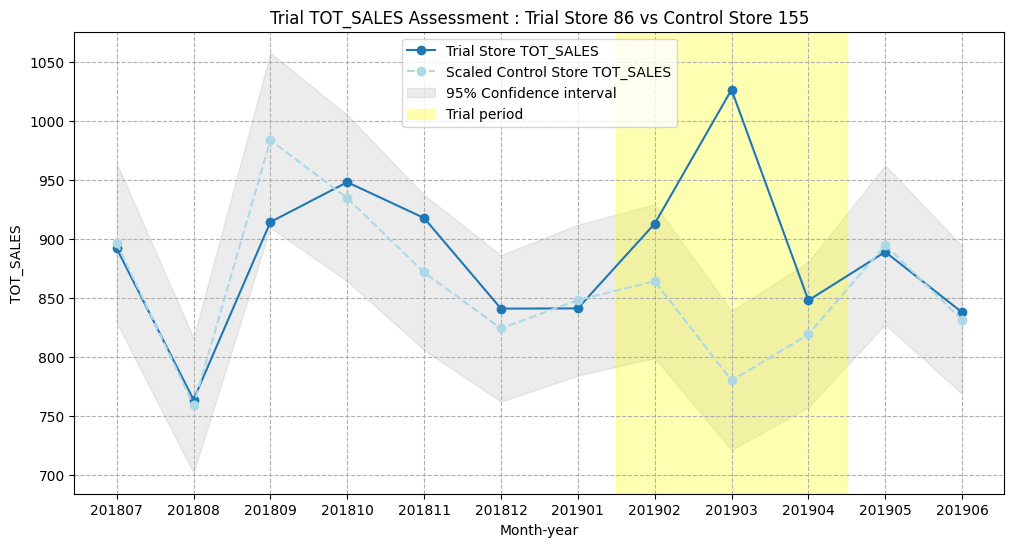

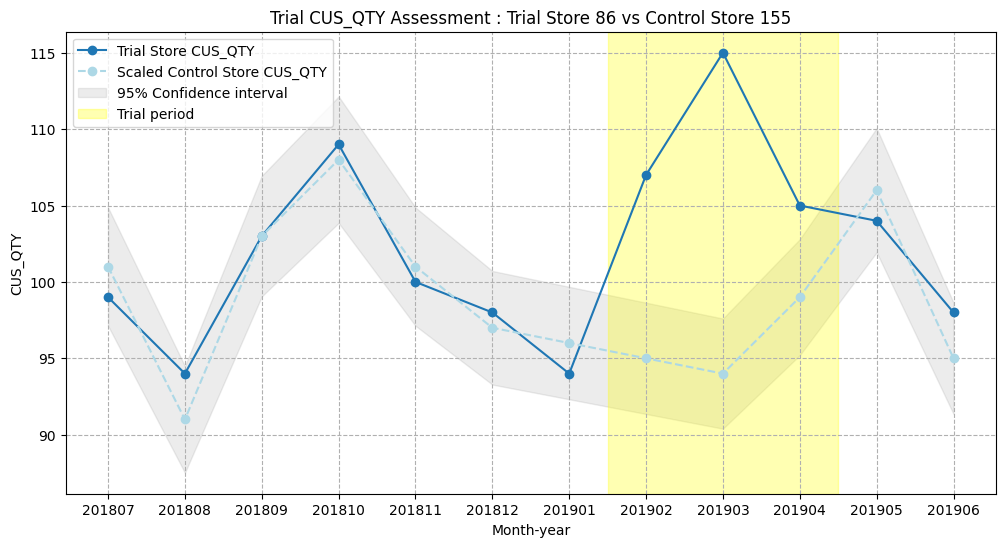

In [37]:
# Apply the fucntion to trial store 86
for metric in metric_to_use: 
    results_df = trial_assessment(monthly_store_pretrial,monthly_store,86,control_store_map,metric)
    display(results_df)

##### **Assessment of Trial Store 86  (vs. Control Store 155)**
- The trial successfully drove a significant **increase in customer traffic** throughout the entire trial period.
- This increased traffic led to a major, statistically significant sales spike of *31.6% in March*. However, the sales uplift was not significant in the other two months.

**Overall Conclusion:** The trial was highly effective at attracting customers, but the impact on overall sales revenue was inconsistent. Therefore, the trial in store 86 did not show a significant difference/improvement in sales.

,MONTH_YEAR,Trial,Control,percentage_diff,t_stat,is_significant
0,201902,1370.2,1407.0,-2.62%,-0.456887,False
1,201903,1477.2,1210.1,22.07%,3.855738,True
2,201904,1439.4,1206.5,19.30%,3.372074,True


,MONTH_YEAR,Trial,Control,percentage_diff,t_stat,is_significant
0,201902,124.0,125.3,-1.04%,-0.656197,False
1,201903,134.0,118.3,13.27%,8.393772,True
2,201904,128.0,119.3,7.29%,4.612337,True


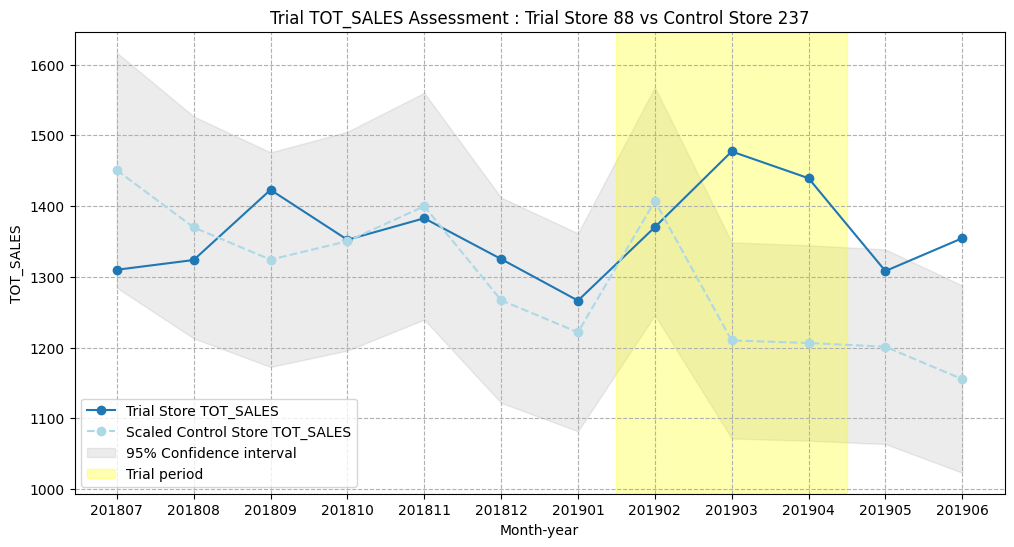

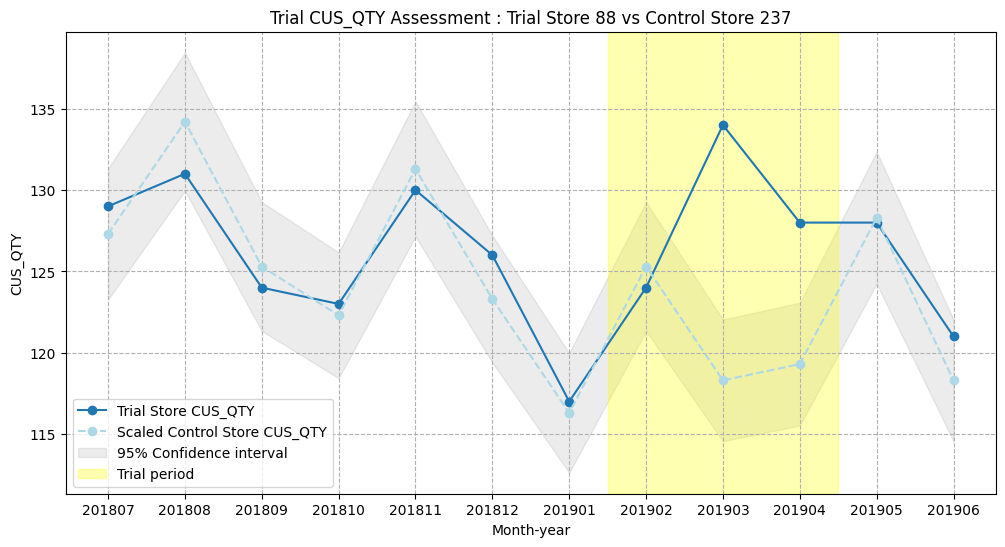

In [38]:
# Apply the fucntion to trial store 88
for metric in metric_to_use: 
    results_df = trial_assessment(monthly_store_pretrial,monthly_store,88,control_store_map,metric)
    display(results_df)

##### **Assessment of Trial store 88 (vs. Control store 237)**
The trial in Store 88 was successful, demonstrating a delayed impact.

After a slow start in February, the store showed a statistically significant increase in both customer numbers and total sales in March and April. This confirms a clear and positive trial effect in the latter two months of the period. 

### **2.3. Trial Conclusion**

The trial has demonstrated a positive and statistically significant impact on sales performance in two of the three trial stores.

**Trial stores 77 and 88** both experienced a significant uplift in sales and customer numbers, confirming the success of the new store layout in these locations.

Conversely, **Trial store 86 did not show a significant increase in sales**, although customer traffic did increase. This suggests the trial's impact in this specific store was not as effective.

**Recommendation:** Based on the strong positive results in stores 77 and 88, the new layout is recommended for a wider rollout to similar stores. Further investigation into the specific conditions of store 86 could provide additional insights for future tests.